In [23]:
import requests
from bs4 import BeautifulSoup
import re

def parse(url):

    #Requestsを使って、webからhtmlを取得
    r = requests.get(url)
    #要素を抽出
    soup = BeautifulSoup(r.content, 'html.parser')

    #タグの削除
    for s in soup(['script', 'style']):
        s.decompose()

    #結合
    text = ' '.join(soup.stripped_strings)
    return text

In [18]:
parse('https://codeforgifu.jp/')

CODE for GIFU TOP MESSAGE PROJECT EVENT CONTACT MESSAGE CODE for GIFUでは「テクノロジーを使って身の回りの困りごとを自分達の手で解決する」ことを目指します。 「テクノロジーなんてよくわからない」「自分でも出来るかな？」という方にも参加して欲しい。何故なら自分だけで出来ない事を、出来るようにする必要なんてありません。あなたが出来る事を少しずつ分け合う事で、みんなの出来る事を増やすのがシビックテック活動の本質です。だから、私たちはあなたの力が必要なんです。 岐阜県が公開しているオープンデータを利用して、公認サイトとして認定されました。 PROJECT 月１回程度不定期でITに関するテーマを設けて少人数で開催しています 平日の夜にWebの勉強や自分のやりたい事を「すいすい」できるようにする会です 手芸部では編み物を中心にMaker Faireやクリエイターズパークへ出展をしています 天文部では不定期で星空や月の写真の撮影会を開催しています EVENT CONTACT メール、もしくはFacebookページからお問い合わせください e-Mail cfgifu@gmail.com Facebook ＠code4gifu CODE for GIFUは 「岐阜市市民活動団体」 に登録しており、「14.情報化社会の振興を図る活動」を推進しています。 Copyright(c) 2016 Sample Inc. All Rights Reserved. Design by http://f-tpl.com


In [20]:
parse('https://www.code4japan.org/')

Code for Japan HOME ニュース 個人 行政 企業 ブリゲード 団体概要 見たい未来は、自分でつくる 社会を変える力は我々ひとりひとりの中にある。 世の中づくりを面白く。 ともに考え、ともにつくろう。 LATEST NEWS 2020.07.17 プレスリリース 学生による学生のための開発コンテスト、 参加者募集を開始 〜Civictech Challenge Cup U-22〜 2020.07.07 活動レポート テックから始まらないシビックテック：CODE for IKOMA吉田 友子さん 2020.07.05 活動レポート Civic Tech Fun! Fun! Report!  2020年 6月号 一覧へ SCROLL MESSAGE 代表メッセージ 「私一人が動いても何も変わらない」そう思っていませんか？たしかに、一人の力は弱いかもしれません。しかし、誰かが動き始めることで人々が繋がり、ムーブメントになり、社会が変わっていきます。Code for Japan は、何かを変えたい人を歓迎します。組織を超えたオープンな繋がりを通じて、ひとりひとりが活き活きと、より良い暮らしをつくっていく。そのための仕掛けを用意しています。 何をつくりたいかは、あなた次第。ワクワクする活動が待っています。ぜひ Code for Japan の仲間とともに最初の一歩を踏み出しましょう。 Happy Civic Hacking! Code for Japan代表　関 治之 WHAT WE DO Code for Japanの活動 行政・市民・企業の三者による、地域づくりへの挑戦 依存ではなく、共創を。 Code for Japan は、私たちひとりひとりが主体的に地域課題を捉え、手を動かしながら解決していくことができる様々な仕掛けを生み出し、オープンに公開しています。日本全国に地域版 Code forがあり、また世界各地にも各国版のCode for があります。そんな仲間たちと連携しながら、ワクワクする未来を創るための環境を育んできました。 市民・企業・自治体（行政）の三者が、それぞれの立場を超えて、様々な人たちと「ともに考え、ともにつくる」社会を実現するために多種多様なサービスやイベントを展開しています。 FOR PEOPLE 個人向け活動のご紹介 イベント・活

## bert-as-serviceに入れる前処理

In [31]:
# 名詞だけ取る
import MeCab
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

rcParams['figure.figsize'] = 10,10

In [93]:
urls = {
    'Sapporo': 'http://www.codeforsapporo.org/',
    'Muroran': 'https://ja.localwiki.org/mr/Code_for_Muroran',
    'Hakodate': 'https://codeforhakodate.org/',
    'Aomori': 'https://codeforaomori.wixsite.com/site',
    'Akita': 'https://code4akita.org/',
    'Sendai': 'https://code4sendai.org/',
    'Aizu': 'http://aizu.io/',
    'Niigata': 'https://www.codeforniigata.org/',
    'Ibaraki': 'https://codeforibaraki.org/',
    'Saitama': 'http://www.code4saitama.org/',
    'Kumagaya': 'http://code4kumagaya.org/',
    'Toda': 'https://codefortoda.org/',
    'Ichikawa': 'http://codeforichikawa.org/',
    'Chiba': 'http://www.code4chiba.org/',
    'Nagareyama': 'http://www.code-for-nagareyama.org/',
    'Funabashi': 'http://code4funabashi.org/',
    'Matsudo': 'https://code4matsudo.org/',
    'Tokyo': 'https://codefor.tokyo/',
    'Adachi': 'https://code4adachi.org/',
    'Shinagawa': 'https://code4shinagawa.org/',
    'Chuo': 'http://c4chuo.mystrikingly.com/',
    'Hachioji': 'http://code4hachioji.org/',
    'OpenKawasaki': 'https://www.openkawasaki.org/',
    'Takaoka': 'http://code4takaoka.org/',
    'Kanazawa': 'http://codeforkanazawa.org/',
    'Aichi': 'https://www.code4aichi.org/',
    'Nagoya': 'https://code4.nagoya/',
    'Uzura': 'https://uzura.org/',
    'Gifu': 'https://codeforgifu.jp/',
    'Kusatsu': 'https://codeforkusatsu.org/',
    'Nara': 'http://code4nara.org/',
    'YamatoKoriyama': 'https://code4yk.jimdofree.com/',
    'Ikoma': 'https://www.code4ikoma.org/',
    'Osaka': 'https://code4.osaka/',
    'Amagasaki': 'https://c4ama.wordpress.com/',
    'Kobe': 'https://codeforkobe.github.io/',
    'Tamba': 'https://opendata.tamba.city/',
    'Kurashiki': 'http://code4kurashiki.org/',
    'Hiroshima': 'https://www.code4hiroshima.org/',
    'Kitakyusyu': 'https://www.code4kitakyushu.org/',
    'Kurume': 'http://code4kurume.org/',
    'Saga': 'http://code4saga.org/',
    'Okinawa': 'https://code4okinawa.org/'
}

In [94]:
def mplg(doc):
    '''
    str->str
    文書から名詞だけを抽出する
    '''
    word_list = ""
    m = MeCab.Tagger ()
    m_doc = m.parse(doc)
    for row in m_doc.split("\n"):
        word =row.split("\t")[0]#タブ区切りになっている１つ目を取り出す。ここには形態素が格納されている
        if word == "EOS":
            break
        else:
            pos = row.split("\t")[1]#タブ区切りになっている2つ目を取り出す。ここには品詞が格納されている
            slice = pos[:2]
            if slice == "名詞":
                word_list = word_list +" "+ word
    return word_list

In [95]:
def tfidf(word_list):
    '''
    str->np.array
    名詞文書をtf-idfベクトルにする
    '''
    docs = np.array(word_list)#Numpyの配列に変換する
    #単語を配列ベクトル化して、TF-IDFを計算する
    vecs = TfidfVectorizer(
                token_pattern=u'(?u)\\b\\w+\\b'#文字列長が 1 の単語を処理対象に含めることを意味します。
                ).fit_transform(docs)
    vecs = vecs.toarray()
    return vecs

In [96]:
def cossim(v1,v2):
    '''
    np.array,np.array -> float
    文書間のcos類似度の計算
    '''
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [133]:
def main(urls):
    '''
    dict -> np.array(ブリゲード数,tf-idfの次元数), list(ブリゲード数,ブリゲード数)
    ブリゲードのurl辞書からtf-idfベクトルを出力する
    '''
    data = list(urls.items())
    docs = [parse(name_url[1]) for name_url in data]
    word_list = []
    for i,doc in enumerate(docs):
        word_list.append(mplg(doc))
        print(data[i][0])
        print(mplg(doc))
        print('----'*5)
    vecs = tfidf(word_list)
    
    tensor = [[cossim(vecs[i],vecs[j]) for j,_ in enumerate(data)] for i,_ in enumerate(data)]
    for i,name_url_i in enumerate(data):
        for j,name_url_j in enumerate(data):
            if i < j:
                print(name_url_i[0],name_url_j[0])
                print(cossim(vecs[i],vecs[j]))
    return vecs,tensor

In [134]:
vecs,tensor = main(urls)

Sapporo
 Code for Sapporo – コード フォー・サッポロ Skip to main content Toggle navigation Code for Sapporo イベント プロジェクト Slack コア メンバー Code for Sapporo JUST 道 IT 北海道 新型 コロナ ウィルス まとめ サイト 参加 2020 年 3 月 10 日 2020 年 3 月 10 日 cfs 道内 新型 コロナ ウイルス 感染 症 COVID - 19 最新 情報 提供 ため JUST 道 IT 北海道 発表 公式 情報 こと 北海道 住まい 方 拠点 企業 方 北海道 全て 方々 現状 冷静 把握 こと 目的 2020 / 03 / 10 時点 北海道 公式 独立 活動 Code for Sapporo JUST 道 IT 活動 賛同 話し合い 場 提供 ( slack )、 メンバー サイト 作成 参加 等 JUST 道 IT ツイート # JUST 道 IT 僕ら 取り組み 週末 東京 都 新型 コロナ ウイルス 感染 症 対策 サイト 北海道 ! 有志 週末 スピード 感 本日 みなさん 公表 こと !! 僕 たち 行政 一 次 情報 いたずら 不安 の データ 現状 把握 デマ 情報 うのみ 状況 こと 理想 一時 情報 もの オープン データ 2020 年 現在 行政 発表 情報 PDF データ 人 目 よう 加工 エクセルデータ 紙 場合 の 現状 今回 JUST 道 IT よう 取組 加工 必要 多く 時間 必要 東京 当たり前 もの 北海道 の よう 気 みなさん サイト 活用 利便 性 データ 加工 感じ ん 事 今後 民間 オープン データ 活用 マスク 供給 トイレットペーパー 買い占め ネガティブ 状況 中 ネガティブ 情報 しよう 僕ら 事実 事実 判断 の 重要 の 闇 闇 こと 光 それ 可能 行政 いま Raw Data Now !” どこ パワーゲーム フィールド プレイヤー 協力 JUST 道 IT 問い合わせ JUST 道 IT Facebook ページ お願い JUST 道 IT 取り組み 共感 開発 運営 参加 希望 方 Code for Sapporo Slack ワーク グループ 参加 ソ

 Code for Akita コンテンツ スキップ Code for Akita Home Code for Akita 活動 報告 アプリ サービス 地域 課題 募集 メンバー 活動 参加 facebook グループ ICT 自分 たち 街 市民 参加 型 オープン コミュニティ click Ready to begin your journey ? Feel free to look around click click click click ICT 自分 たち 街 市民 参加 型 オープン コミュニティ click オープン データ ねた 技術 者 以外 可能 自宅 テクノロジー 行政 方法 投稿 日 : 2020 年 5 月 8 日 2020 年 5 月 8 日 https :// business . nikkei . com / atcl / seminar / 19 / 00058 / 050700050 / オープン データ 秋田 市 休校 中 放課後 児童 クラフ ゙ 受入れ 可能 状況 投稿 日 : 2020 年 3 月 9 日 2020 年 3 月 9 日 秋田 市 公表 休校 中 放課後 児童 クラフ ゙ 受入れ 可能 状況 独自 データ 追加 MAP 上 表示 仕組み https :// code 4 akita . org / labs / gakudo / 秋田 市 ページ https :// www . city . akita . lg . jp / kurashi / kosodate / 1005859 / 1021327 . html 当初 PDF 内容 抽出 オープン データ 公表 こと 現在 csv 形式 データ 直接 表示 オープン データ ねた バス 運行 情報 アプリ 表示 教養 大 実証 実験 中 投稿 日 : 2020 年 3 月 9 日 https :// news . line . me / issue / oa - sakigake / 6 a 53 f 92 bd 8 f 2 オープン データ ねた 福井 県 ー 連携 開始 オープン データ 利用 子育て 支援 地域 活性 化 サポ ト 投稿 日 : 2020 年 2 月 21 日 2020 年 2 月 21 日 https :// prtimes 

Saitama
 code 4 saitama . github . io View On GitHub code 4 saitama . github . io Project maintained by Code 4 Saitama Hosted on GitHub Pages — Theme by mattgraham Code for SAITAMA SAITAMA IT 力 社会 課題 解決 こと 市民 こと 目的 団体 2014 年 1 月 発足 以降 マッピング パーティ アイデアソン ハッカソン 勉強 会 様々 イベント 月 イチ 開催 ロゴ 埼玉 勾玉 マップ ピン LINK Facebook 活動 最近 Discord Facebook グループ Facebook イベント Discord GitHub
--------------------
Kumagaya
 Code for Kumagaya – とも とも Toggle navigation Code for Kumagaya 問い合わせ 新着 情報 ウィキペディアタウン in 熊谷 開催 2018 - 11 - 25 / C 4 K 活動 報告 , Wikipedia , ウィキペディアタウン , まち 歩き 2018 年 11 月 25 日 埼玉 県立 熊谷 図書館 主催 ウィキペディアタウン in 熊谷 サポート 参加 当日 天気 小学生 大人 県 外 多く 方 参加 午前 続き 熊谷 観光 ハッカソン Huck for D アイデア アプリ 2018 - 03 - 03 / C 4 K 活動 報告 , hackathon , ハッカソン 2017 年 6 月 25 日 開催 熊谷 埼玉 観光 アイディアソン 熊谷 観光 ハッカソン Huck for D 開催 当日 インターナショナルオープンデータデイ 事 前半 続き 本庄 マッピング パーティー 開催 2018 - 01 - 08 / C 4 K 活動 報告 , OpenStreetMap , まち 歩き , マッピング パーティー 本庄 オープン ハウス 開催 オープン ハウス ７ 回 イベント 本庄 中山道 まち 歩き マッピング パーティー 開催 当日 みぞ 混じり 小雨 中 本庄 中山道 沿い 建物 観光 スポ 続き 市

 Code for Matsudo ナビゲーション コンテンツ スキップ コンテンツ スキップ Home News About us App Coder Dojo Matsudo Contact コード 松戸 豊か Apps 常盤平 さくら まつり 日本 道 100 選 さくら 通り 常盤平 さくら まつり Web アプリ 常盤平 さくら まつり 実行 委員 会 協力 作成 松戸 まもる 君 2017 年 2 月 25 日 つど 開催 アイデアソン IT 子ども 犯罪 事故 災害 アイデア 元 2017 年 3 月 4 日 麗 澤 大学 開催 IODD インターナショナル オープンデータデイ ハッカソン 作成 About us 私 たち Code for Matsudo コード 地域 課題 解決 こと 活動 コード プログラム こと オープン データ 活用 ソフトウェア 地域 課題 浮き彫り 解決 さまざま 取り組み 地域 方々 行政 一緒 最新 ニュース 16 回 コーダー 道場 開催 案内 7 月 11 日 土 13 時 30 分 16 回 コーダー 道場 つど 開催 2020 / 7 / 11 土 13 時 30 分 ～ 15 時 30 分 13 時 開場 募集 2020 / 7 / 1 Connpass サイト 学校 再開 新型 コロナ ウィルス 予防 […] コーダー 道場 南柏 流山 松戸 オンライン 開催 案内 5 / 16 ( 土 ) ご無沙汰 コーダー 道場 チャンピオン の みなさん お過ごし StayHome 松戸 市 小中学校 ５月 末 休校 延長 普段 通り 学校 の […] 14 回 コーダー 道場 開催 報告 報告 1 月 25 日 土 2020 年 最初 道場 開催 道場 無事 3 年 目 こと 毎回 Connpass 募集 開始 10 分 満席 人気 こと […] 14 回 コーダー 道場 開催 案内 1 月 25 日 土 13 時 30 分 14 回 コーダー 道場 つど 開催 2020 / 1 / 25 土 13 時 30 分 ～ 16 時 00 分 13 時 開場 募集 2020 / 1 / 1 Connpass サイト 令 和 最初 お正月 よう […] 13 回 コーダー 道場 開催 報告 11 / 9 土 今年 7 回 

 オープン 川崎 / Code for Kawasaki | 川崎 市 活性 化 こと 目的 市民 参加 型 コミュニティ About プロジェクト オープン 川崎 川崎 市 活性 化 こと 目的 市民 参加 型 コミュニティ 川崎 ならでは コミュニティ 次世代 人材 育成 地域 地域 課題 解決 新た 事業 創造 Code for Kawasaki Code for Kawasaki オープン 川崎 運営 母体 分科 会 市民 自ら 主体 IT 技術 ( テクノロジー ) 活用 地域 社会 課題 解決 ため 取り組み 考え方 シビック テック 川崎 市 中心 地域 エコ システム 創 生 オープン データ オープンガバメント 推進 こと 活動 オープン 川崎 考え方 川崎 モノ づくり 人材 宝庫 大人 遊び場 秘密 基地 専門 的 活動 の 分科 会 どこ 中立 中道 ジャンル こと 大人 子供 熱中 よう こと まじめ 民主 的 コミュニティ オープン 川崎 / Code for Kawasaki openkawasaki openkawasaki openkawasaki 川崎 市 活性 化 こと 目的 市民 参加 型 コミュニティ
--------------------
Takaoka
 Code for Takaoka メンバー 向け 古城 公園 マップ 作成 ツール Go ツール Android 版 download ツール 管理 者 向け トップ Go Last update 2017 . 01 . 14 Designed by Makino
--------------------
Kanazawa
 code for kanazawa コード 世界 Happy 一般 社団 法人 コード フォー・カナザワ Code for Kanazawa ) IT デザイン 力 私 たち 市民 生活 今 こと 私 たち 地域 問題 シンプル 具体 的 解決 方法 開発 CfK 活動 こちら ご覧 シビックテックコミュニティブック 配布 中 全国 シビック テック 団体 活動 内容 / CodeForKanazawa Head office \ 920 - 0856 金沢 市 昭和 町 12 - 6 mail : cfk - office @ codefork

Uzura
 Code for MIKAWA – うずら インキュベータ コンテンツ スキップ うずら インキュベータ Facebook メニュー Home Event About API 豊橋 API 利用 規約 豊橋 API イベント 検索 API 豊橋 API 施設 検索 API 検索 : アプリ / イベント 開催 報告 2020 / 1 / 26 さくら クラ ウド LoRa 会 キックオフ Posted on 2020 / 02 / 13 by 村井 宏 輔 概要 The things network LoRa 豊橋 オープン IoT ネットワーク 試験 的 構築 課題 解決 アイディア 形 ため イベント 実施 イベント ページ https :// uzura . doorkeeper . jp / events / 99254 こと エリア 内 市販 LoRa エッジ デバイス 利用 こと だれ サーバ データ アップ ロード 可能 従来 IoT 個人 回線 契約 行い 通信 料 負担 必要 LoRa WAN 通信 コスト IoT デバイス 構築 ため 個人 活動 人 手軽 IoT 構築 こと 可能 ため LoRa 利用 IoT 東 三 河 課題 住民 解決 地域 ゲート ウェイ 設置 豊橋 サイエンス コア 屋上 ゲート ウェイ 設置 0 . 準備 ゲート ウェイ 設置 準備 設置 必要 物品 選定 ゲート ウェイ ルータ 間 配線 方法 経路 ゲート ウェイ 電源 確保 設置 方法 検討 設置 場所 交渉 1 . 設置 場所 下調べ ゲート ウェイ サイエンス コア 屋上 設置 屋上 ゲート ウェイ 設置 場所 複数 箇所 比較 設置 場所 検討 設置 場所 選定 ポイント 周囲 エアコン 室外 機 電波 よう 場所 さ 方 遠く 電波 ため 豊橋 風 ゲート ウェイ 風 よう 場所 いくつ 設置 場所 ボックス 安定 性 確認 ケーブル 配線 経路 確認 2 . ゲート ウェイ 設置 準備 安全 取り付け 工事 風 よう 設置 方法 検討 工事 日程 調整 作業 流れ 確認 取り付け 場所 下 配線 方法 共有 取り付け 機器 作業 取り付け 方法 確認 3 . ゲート ウェイ 設置 工事 ゲート ウェイ 設置 工事 流れ LAN ケーブル 敷

 Code for Amagasaki – 創造 コンテンツ スキップ Code for Amagasaki 創造 メニュー TOP ページ Code for Amgasaki 活動 実績 活動 実績 ～ 2019 年 ～ 活動 実績 ～ 2018 年 ～ 活動 実績 ～ 2017 年 ～ 活動 実績 ～ 2016 年 ～ メディア 紹介 出演 問い合わせ GitHub 尼崎 版 5374 . jp Code for Amagasaki Ver 4 . 05 議事 録 2020 年 7 月 3 日 ~ nabezo 2525 ~ コメント 久しぶり 開催 C 4 AMA 7 月 度 定例 会 議事 録 Code for Amagasaki Ver 4 . 03 議事 録 2020 年 5 月 7 日 ~ mtada 2013 ~ コメント 連休 明け ５月 度 定例 会議 事 録 コロナ 影響 どこ の 飲食 店 ＩＴ 利 活用 続き Code for Amagasaki Ver 4 . 03 議事 録 尼崎 市内 持ち帰り 配達 マップ 2020 年 4 月 19 日 ~ mtada 2013 ~ コメント 先日 尼崎 市内 持ち帰り 配達 マップ 作成 事 投稿 uMap の 他 Code 続き 尼崎 市内 持ち帰り 配達 マップ 尼崎 市内 持ち帰り 配達 マップ 2020 年 4 月 15 日 ~ mtada 2013 ~ 1 件 コメント コロナ 収束 皆さん 如何 お過ごし 腹 事 市内 持ち帰り 続き 尼崎 市内 持ち帰り 配達 マップ 4 月 度 定例 会 案内 オンライン 形式 2020 年 3 月 31 日 2020 年 3 月 30 日 ~ nabezo 2525 ~ コメント Code for Amagasaki 4 月 度 定例 会 案内 今回 オンライン 形式 開催 3 月 度 定例 会 お知らせ オンライン 形式 2020 年 3 月 4 日 2020 年 3 月 4 日 ~ nabezo 2525 ~ コメント Code for Amagasaki ( C 4 AMA ) 事務 局 渡辺 平素 C 4 AMA 活動 協力 続き 3 月 度 定例 会 お知らせ オンライン 形式 開催 形式 変更 3 月 7 日 ( 土 )、 GPS 絵

Kurashiki
 Code for Kurashiki – ICT 技術 地域 コンテンツ スキップ Code for Kurashiki ICT 技術 地域 Home Contact About Us Code for Kurashiki ICT 技術 地域 Code for Kurashiki ICT 技術 地域 体験 ぇ ～ 出展 Posted 2017 年 7 月 23 日 2017 年 10 月 13 日 g - adachi カテゴリー : 活動 報告 7 月 21 日 22 日 リサーチ パーク 開催 体験 ぇ ～」 参加 今年 多く 方 […] 体験 ぇ ～ 出展 Posted 2017 年 7 月 15 日 2017 年 10 月 13 日 g - adachi カテゴリー : イベント 今年 体験 ぇ ～」 出展 昨年 同様 IoT 体験 びとけんだま データ どこ […] UDC 2017 岡山 ブロックキックオフイベント データ 利 活用 研究 会 セミナー データ 都市 空間 デザイン 開催 Posted 2017 年 7 月 9 日 2017 年 10 月 13 日 g - adachi カテゴリー : 活動 報告 一般 社団 法人 データクレイドル 共催 アーバンデータチャレンジ 2017 岡山 ブロック キックオフ イベント […] IODD 2017 inKurashiki 開催 Posted 2017 年 3 月 4 日 g - adachi カテゴリー : 活動 報告 今年 インターナショナルオープンデータデイ 倉敷 開催 今年 観光 防災 街 歩き トークセッ […] Kyu - SHOCK Posted 2016 年 12 月 13 日 g - adachi カテゴリー : 活動 報告 名古屋 RESAS API ハッカソン Kyu - SHOCK コンテンツ 現在 版 作 […] 名古屋 遠征 ハッカソン 参加 Posted 2016 年 12 月 4 日 g - adachi カテゴリー : 活動 報告 有志 メンバー 12 / 3 , 4 開催 名古屋 ハッカソン 参加 今回 チーム ラボ 方 RESAS […] 賑わい 度 調査 協力 Posted 2016 年 10 月 13 日 g - adachi カテゴリ

Sapporo Muroran
0.22582906576923073
Sapporo Hakodate
0.14449009459577256
Sapporo Aomori
0.13750566992285287
Sapporo Akita
0.3928072338022936
Sapporo Sendai
0.2456202962926717
Sapporo Aizu
0.08150801022489104
Sapporo Niigata
0.2527606614157854
Sapporo Ibaraki
0.34531466278583794
Sapporo Saitama
0.10469134106144051
Sapporo Kumagaya
0.16258627903195236
Sapporo Toda
0.335515608389966
Sapporo Ichikawa
0.18732552532217703
Sapporo Chiba
0.2212389874945035
Sapporo Nagareyama
0.2331142607667079
Sapporo Funabashi
0.14689468696022046
Sapporo Matsudo
0.16520069083988556
Sapporo Tokyo
0.14820504803803697
Sapporo Adachi
0.17944093579913536
Sapporo Shinagawa
0.0909882368521732
Sapporo Chuo
0.18919888453893804
Sapporo Hachioji
0.19936376821641294
Sapporo OpenKawasaki
0.11172887595574413
Sapporo Takaoka
0.05177039498294144
Sapporo Kanazawa
0.09051385282959867
Sapporo Aichi
0.14991272921570173
Sapporo Nagoya
0.2953161547814953
Sapporo Uzura
0.20949793792901272
Sapporo Gifu
0.1184776078137606
Sapporo Kus

0.16438803084939754
Ibaraki Toda
0.24916027758596537
Ibaraki Ichikawa
0.18032290740823045
Ibaraki Chiba
0.1892036294229993
Ibaraki Nagareyama
0.2048161643006705
Ibaraki Funabashi
0.1363706994072878
Ibaraki Matsudo
0.11962916331990951
Ibaraki Tokyo
0.07454758706972789
Ibaraki Adachi
0.14172470083635702
Ibaraki Shinagawa
0.0761358725342338
Ibaraki Chuo
0.12007398895265012
Ibaraki Hachioji
0.22100779860783495
Ibaraki OpenKawasaki
0.08639390688811725
Ibaraki Takaoka
0.05498614882382808
Ibaraki Kanazawa
0.11806908011576443
Ibaraki Aichi
0.14967558390449898
Ibaraki Nagoya
0.3427804308960813
Ibaraki Uzura
0.1868468496639231
Ibaraki Gifu
0.12333521758658837
Ibaraki Kusatsu
0.10521600870492336
Ibaraki Nara
0.2405191828271262
Ibaraki YamatoKoriyama
0.05963374722678286
Ibaraki Ikoma
0.09356116488925759
Ibaraki Osaka
0.06656112729979331
Ibaraki Amagasaki
0.17456990009489756
Ibaraki Kobe
0.11553707542752074
Ibaraki Tamba
0.26529149281640635
Ibaraki Kurashiki
0.2570633692787301
Ibaraki Hiroshima
0.0

0.025351309928086273
Shinagawa Tamba
0.06390017873142266
Shinagawa Kurashiki
0.06291594860452088
Shinagawa Hiroshima
0.03241736859756897
Shinagawa Kitakyusyu
0.08598618334952197
Shinagawa Kurume
0.06486971616004138
Shinagawa Saga
0.05786396193205913
Shinagawa Okinawa
0.06715455616737469
Chuo Hachioji
0.06728322236171812
Chuo OpenKawasaki
0.0841569323255605
Chuo Takaoka
0.035218095929571515
Chuo Kanazawa
0.05661104243553266
Chuo Aichi
0.06271610149904473
Chuo Nagoya
0.11468708956821186
Chuo Uzura
0.12615524134515604
Chuo Gifu
0.09371959806604922
Chuo Kusatsu
0.05099382898416412
Chuo Nara
0.06362449582769962
Chuo YamatoKoriyama
0.04296783390739109
Chuo Ikoma
0.043953885818154154
Chuo Osaka
0.026880817360892637
Chuo Amagasaki
0.06006231416310341
Chuo Kobe
0.03297633103012692
Chuo Tamba
0.04855427414436554
Chuo Kurashiki
0.05098852480676601
Chuo Hiroshima
0.06401020602740298
Chuo Kitakyusyu
0.06110358426098473
Chuo Kurume
0.05276411467563058
Chuo Saga
0.033107725648995806
Chuo Okinawa
0.09

In [113]:
x = pd.DataFrame(tensor,columns=urls.keys(),index=urls.keys())

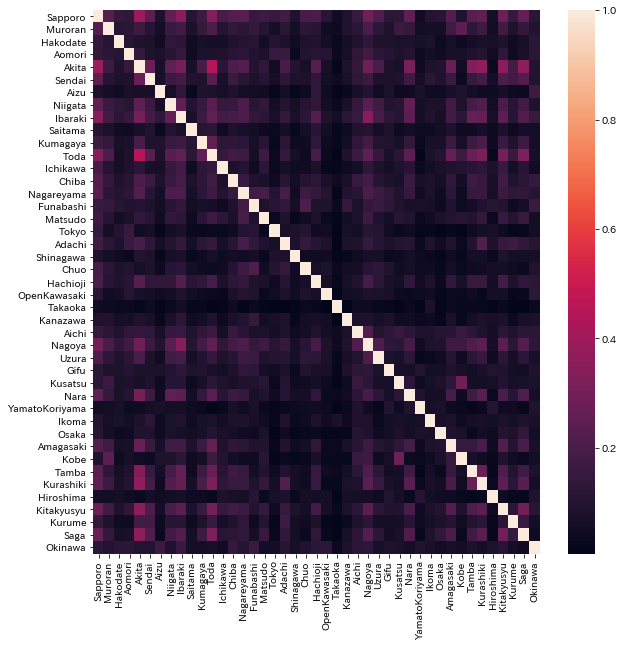

In [127]:
plt.figure()
sns.heatmap(x)
plt.show()

In [116]:
# t-SNE
#t_sne = TSNE(perplexity=30, learning_rate=500).fit_transform(country_vec)
t_sne = TSNE().fit_transform(vecs)
print('t_sne shape:', t_sne.shape)

# KMeansクラスタリング
clustered = KMeans(n_clusters=5).fit_predict(x)

t_sne shape: (43, 2)


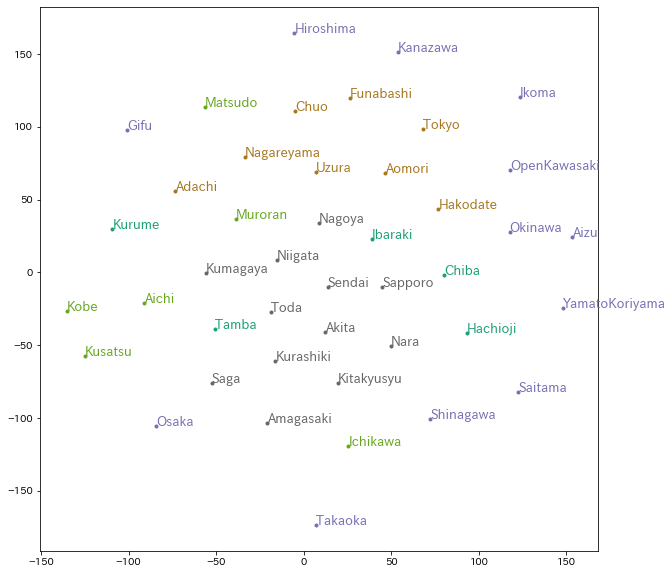

In [131]:
fig, ax = plt.subplots(figsize=(10, 10))

cmap = plt.get_cmap('Dark2')
for i in range(t_sne.shape[0]):
    cval = cmap(clustered[i] / 4)
    ax.scatter(t_sne[i][0], t_sne[i][1], marker='.', color=cval)
    ax.annotate(x.index[i], xy=(t_sne[i][0], t_sne[i][1]), color=cval,size=13)
plt.show()